This notebook contains two parts: 
* Exploration work: codes for exploring the data and the best way to construct the predition system, as well as notes on **future steps given more time**. 
* Formal work: codes for the systematicity-mitigated prediction system and evaluating metrics.

# Exploration work

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot') 
%matplotlib inline

## EDA

Futher steps given more time:

* Handling missing value: drop features with too many missing values, or filling in missing value based on the actual meaning of the feature 

* Feature engineering: conduct a more detailed exploration on every features to check for outliers, and better dealing with features such as ethnicity

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,candidate_id,application_status,number_of_employees_log,occupation_id,company_id,occupation_skill_1_count,occupation_skill_2_count,occupation_skill_3_count,occupation_skill_4_count,occupation_skill_5_count,...,candidate_skill_2_count,candidate_skill_3_count,candidate_skill_4_count,candidate_skill_5_count,candidate_skill_6_count,candidate_skill_7_count,candidate_skill_8_count,candidate_skill_9_count,candidate_relative_test_1,candidate_relative_test_2
0,bgjikcrozdgkrtzigymnaylpypxxublc0,interview,2.0,exvwhbxlejsfyqxnwjabksnntpwodfhr0,xuemjhkyskdkwxlfbykrvkrffvpoepid0,1.0,0.0,0.0,1.0,0.0,...,7.0,2.0,8.0,12.0,0.0,9.0,4.0,6.0,0.600274,0.348715
1,pgvjmzqyjgzmbgqetvzteeejufcexbur1,interview,1.0,jpegpbxvbsjbkwmahpbvcdbxzcdjmack1,ndahnrikmemhkgwgsrfoaazzkszfntja1,0.0,0.0,0.0,1.0,1.0,...,NaN,0.0,4.0,10.0,5.0,1.0,3.0,0.0,0.759273,0.972119
2,snzyhcbqkbtiydfxcxhpcyzuirxzpxcx2,interview,1.0,czwkhxbmdopwdiuufvsxtahuqnifojgl2,xzlecjjnxynakiohuqudeusnnrzlrivp2,0.0,1.0,NaN,0.0,1.0,...,4.0,7.0,4.0,NaN,2.0,NaN,6.0,1.0,0.664639,0.597499
3,tbugkzlvhnkjkgzclndonrcusetoygmc3,hired,4.0,aeuvpjqtkaeeqghymzriuvoyqfzikhwq3,hxxnjooagjshdqeioibhovqqggztvbaw3,NaN,NaN,NaN,NaN,0.0,...,5.0,7.0,0.0,3.0,1.0,8.0,0.0,NaN,0.622446,0.569189
4,fxhprrcbbbqkuidxmjcahezgljgnxbte4,hired,4.0,iyejtuewotamjissxrmlncpoteqyqvdk4,tqjeojjlpmnmnnoxyrewiacjzipaawpm4,0.0,NaN,NaN,0.0,NaN,...,6.0,NaN,8.0,NaN,1.0,1.0,10.0,4.0,0.493108,0.708251


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 60 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   candidate_id                       50000 non-null  object 
 1   application_status                 50000 non-null  object 
 2   number_of_employees_log            50000 non-null  float64
 3   occupation_id                      50000 non-null  object 
 4   company_id                         50000 non-null  object 
 5   occupation_skill_1_count           33374 non-null  float64
 6   occupation_skill_2_count           37227 non-null  float64
 7   occupation_skill_3_count           34724 non-null  float64
 8   occupation_skill_4_count           36279 non-null  float64
 9   occupation_skill_5_count           34998 non-null  float64
 10  occupation_skill_6_count           30468 non-null  float64
 11  occupation_skill_7_count           32920 non-null  flo

<AxesSubplot:>

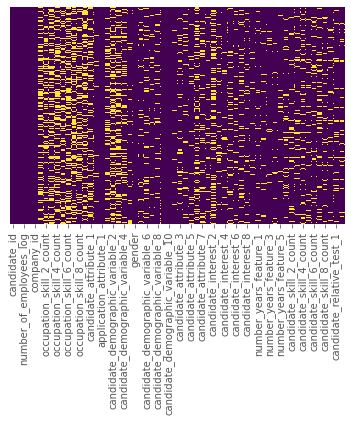

In [7]:
# checking missing value

## As shown below, a lot of features contain quite a portion of missing value
## Given more time, we can handle the missing values more properly
## But for now, I am gonna skip this step and use models that can accept missing values in features

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df['application_status'].value_counts()

pre-interview    20350
hired            15122
interview        14528
Name: application_status, dtype: int64

In [16]:
# Ethinicity 

## If given more time, I would engineer this feature 
## by further buketing them into more standard categories to decrease the number of the categories

df['ethnicity'].value_counts()

White English / Welsh / Scottish / Northern Irish / British    6516
Black African                                                  2821
Black / African / Caribbean any other background               2366
Mixed ethnic any other background                              2255
Asian Bangladeshi                                              2033
Any other ethnic group not listed                              2010
Hispanic / Latinx                                              1988
Black or African American                                      1985
Mixed ethnic White and Black Caribbean                         1924
Mixed ethnic White and Asian                                   1918
Asian Indian                                                   1882
Asian Pakistani                                                1819
White Irish                                                    1759
White                                                          1629
Black Caribbean                                 

In [17]:
# gender
df['gender'].value_counts()

Male      19354
Female    17909
Other     12737
Name: gender, dtype: int64

In [18]:
# immigration status
df['candidate_demographic_variable_5'].value_counts()

citizenship           13977
other_document         8618
work_permit            8128
work_card              7440
international_visa     6516
Name: candidate_demographic_variable_5, dtype: int64

<AxesSubplot:>

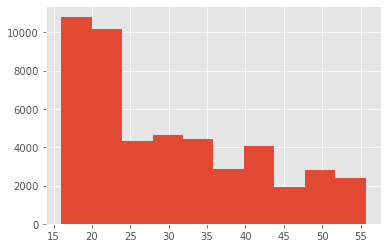

In [20]:
# Looks like there are no abnormal values in age
df['age'].hist()

In [19]:
# This feature seems not suitable to be included as a feature
df['application_attribute_1'].nunique()

50000

## Testing Different Predictors

Futher steps given more time:

* Add more heterogeneous predictors: Other than boosting models, include different types of models such as multinomial regressions, random forests, neural networks

* Selecting predictors: select predictors whose performance pass a certain threshold

* Dealing with algorithm bias: using tools like Fairlearn to validate and mitigate algorithm bias before the random classifier ensembles

In [138]:
# preprocessing X

## dropping non-features
df1 = df.copy().drop(['candidate_id','occupation_id','company_id','application_attribute_1'],axis=1)

## solving feature names conflicts: two 'Other'
df1['gender'] = df1['gender'].apply(lambda x: 'Other_gender' if x == 'Other' else x)
df1['ethnicity'] = df1['ethnicity'].apply(lambda x: 'Other_ethnicity' if x == 'Other' else x)

## one-hot encoding categorial variables
gender = pd.get_dummies(df1['gender'],drop_first=True) 
ethnicity = pd.get_dummies(df1['ethnicity'],drop_first=True)
candidate_demographic_variable_5 = pd.get_dummies(df1['candidate_demographic_variable_5'],drop_first=True)
df1.drop(['gender','ethnicity','candidate_demographic_variable_5'],axis=1,inplace=True)

## To further address the algorithm bias, we can use the tools like Fairlearn
## Due to the time constraint, we will skip this step and focus on systematic bias for now
df1 = pd.concat([df1,gender,ethnicity,candidate_demographic_variable_5],axis=1)


In [139]:
# train-test split

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(df1.drop('application_status',axis=1), 
                                                    df1['application_status'], test_size=0.20, 
                                                    random_state=823)

In [27]:
# Xgboost predictor
import xgboost as xgb

xlf=xgb.XGBClassifier(objective='multi:softmax',num_class=3)

xlf.fit(X_train, y_train)
pred_xgb = xlf.predict(X_test)

print(classification_report(y_test, pred_xgb))


               precision    recall  f1-score   support

        hired       0.77      0.72      0.74      4504
    interview       0.73      0.71      0.72      4310
pre-interview       0.74      0.78      0.76      6186

     accuracy                           0.74     15000
    macro avg       0.75      0.74      0.74     15000
 weighted avg       0.74      0.74      0.74     15000



In [28]:
# lightGBM predictor
import lightgbm as lgb

llf=lgb.LGBMClassifier(objective='multi:softmax',num_class=3)
llf.fit(X_train, y_train)
pred_llf = llf.predict(X_test)

print(classification_report(y_test, pred_llf))


               precision    recall  f1-score   support

        hired       0.79      0.72      0.75      4504
    interview       0.75      0.73      0.74      4310
pre-interview       0.74      0.80      0.77      6186

     accuracy                           0.76     15000
    macro avg       0.76      0.75      0.75     15000
 weighted avg       0.76      0.76      0.76     15000



In [199]:
# catboost
import catboost as cab

cat_features = df1.columns[-30:] #all the categorical features
clf=cab.CatBoostClassifier(cat_features=cat_features,loss_function='MultiClass',verbose=False)
clf.fit(X_train, y_train)

pred_clf = clf.predict(X_test).reshape(1,-1)[0]

print(classification_report(y_test, pred_clf))


               precision    recall  f1-score   support

        hired       0.77      0.73      0.75      3033
    interview       0.74      0.70      0.72      2856
pre-interview       0.73      0.79      0.76      4111

     accuracy                           0.74     10000
    macro avg       0.75      0.74      0.74     10000
 weighted avg       0.74      0.74      0.74     10000



#### Since there is no substantial difference in the performance of these models, I am going to include all of them in the random classifier ensembles.

## Metrics

Futher steps given more time:
* Dive deep into the confusion matrix to compute more profound metrics, since the cost of different classification errors might be different

One possible thought: 

Considering the randomness: the unbiased prediction system may generate the different result to the same data points than biased ones

Metrics: # of individuals with different predictions between regular_predict() and predict() / # of total individuals, which is actually 1 - accuracy

# Formal work

## Comparism of Regular and Systematicity-mitigated Prediction Systems

### Constructing two prediction systems

In [1]:
# loading packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot') 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb
import catboost as cab
import random


In [2]:
def preprocessing(file_name):
    '''This function preprocess the dataframe to prep it for prediction modeling.'''
    
    # reading data
    df = pd.read_csv(file_name)

    # dropping non-features
    df1 = df.copy().drop(['candidate_id','occupation_id','company_id','application_attribute_1'],axis=1)

    # solving feature names conflicts: two 'Other'
    df1['gender'] = df1['gender'].apply(lambda x: 'Other_gender' if x == 'Other' else x)
    df1['ethnicity'] = df1['ethnicity'].apply(lambda x: 'Other_ethnicity' if x == 'Other' else x)

    # one-hot encoding categorial variables
    gender = pd.get_dummies(df1['gender'],drop_first=True) 
    ethnicity = pd.get_dummies(df1['ethnicity'],drop_first=True)
    candidate_demographic_variable_5 = pd.get_dummies(df1['candidate_demographic_variable_5'],drop_first=True)
    df1.drop(['gender','ethnicity','candidate_demographic_variable_5'],axis=1,inplace=True)

    # To further address the algorithm bias, we can use the tools like Fairlearn
    # Due to the time constraint, we will skip this step and focus on systematic bias for now
    df1 = pd.concat([df1,gender,ethnicity,candidate_demographic_variable_5],axis=1)

    return df1

### Regular Prediction System

In [9]:
def regular_predict(file_name,random_seed):
    '''This function choose the model with the highest accuracy to predict.'''
    
    # preprocessing data
    df1 = preprocessing(file_name)
    
    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(df1.drop('application_status',axis=1), 
                                                    df1['application_status'], test_size=0.20, 
                                                    random_state=random_seed)
    
    
    
    # XGBoost
    xlf=xgb.XGBClassifier(objective='multi:softmax',num_class=3)
    xlf.fit(X_train, y_train)
    pred_xgb = xlf.predict(X_test)
    accu_xgb = accuracy_score(y_test,pred_xgb)
    
    # LightGBM
    llf=lgb.LGBMClassifier(objective='multi:softmax',num_class=3)
    llf.fit(X_train, y_train)
    pred_llf = llf.predict(X_test)
    accu_llf = accuracy_score(y_test,pred_llf)

    # CatBoost
    cat_features = df1.columns[-30:] #all the categorical features
    clf=cab.CatBoostClassifier(cat_features=cat_features,loss_function='MultiClass',verbose=False)
    clf.fit(X_train, y_train)
    pred_clf = clf.predict(X_test).reshape(1,-1)[0]
    accu_clf = accuracy_score(y_test,pred_clf)
    
    # models
    models = [xlf,llf,clf]
    # accuracy score
    accuracy_scores = np.array([accu_xgb,accu_llf,accu_clf])
    
    # Find the best predictor based on accuracy
    best_predictor = models[np.argmax(accuracy_scores)]

    print('Best predictor:',best_predictor)
    
    # return the predicted result of the best predictor
    return best_predictor.predict(X_test).tolist()

    


In [11]:
random_seed = 823
regular_pred = regular_predict('data.csv',random_seed)

Best predictor: LGBMClassifier(num_class=3, objective='multi:softmax')


### Systematicity-mitigated Prediction System

In [12]:
def predict(file_name,random_seed):
    '''This function choose a random model to predict.'''
    
    # preprocessing data
    df1 = preprocessing(file_name)
    
    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(df1.drop('application_status',axis=1), 
                                                    df1['application_status'], test_size=0.20, 
                                                    random_state=random_seed)
    
    # XGBoost
    xlf=xgb.XGBClassifier(objective='multi:softmax',num_class=3)
    xlf.fit(X_train, y_train)
    
    # LightGBM
    llf=lgb.LGBMClassifier(objective='multi:softmax',num_class=3)
    llf.fit(X_train, y_train)
    
    # CatBoost
    cat_features = df1.columns[-30:] #all the categorical features
    clf=cab.CatBoostClassifier(cat_features=cat_features,loss_function='MultiClass',verbose=False)
    clf.fit(X_train, y_train)
    
    # prediction results
    pred = [np.nan]*y_test.size
    
    # predicting
    for i in range(X_test.shape[0]):
        
        # draw a random number from (0,1,2)
        random_num = random.randint(0,2)
    
        # XGBoost
        if random_num == 0:
            pred[i] = xlf.predict(X_test.iloc[[i]])[0]
        
        # LightGBM
        elif random_num == 1:
            pred[i] = llf.predict(X_test.iloc[[i]])[0]
            
        # CatBoost
        else:
            pred[i] = clf.predict(X_test.iloc[[i]]).reshape(1,-1)[0][0]
    
 
    return pred


In [13]:
random_seed = 823
pred = predict('data.csv',random_seed)

### Metrics: evalutaing the mitigation

In [268]:
accuracy_score(pred,regular_pred)

0.9264

In [267]:
print(classification_report(pred,regular_pred,labels=["hired", "interview", "pre-interview"]))


               precision    recall  f1-score   support

        hired       0.94      0.91      0.92      2826
    interview       0.91      0.92      0.92      2769
pre-interview       0.93      0.94      0.93      4405

     accuracy                           0.93     10000
    macro avg       0.93      0.92      0.93     10000
 weighted avg       0.93      0.93      0.93     10000



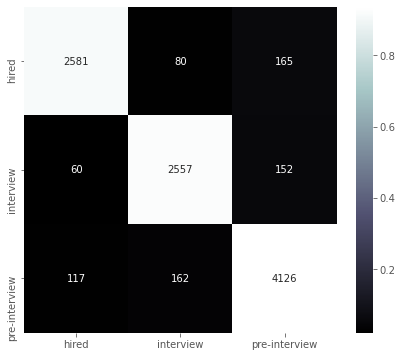

In [269]:
# kinda confusion matrix
cm = confusion_matrix(pred,regular_pred,labels=["hired", "interview", "pre-interview"])

def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)

plot_confusion_matrix(cm, ['hired', 'interview', 'pre-interview'])

## Simulation

In [20]:
def systematicity_evaluation(file_name):
    '''
    This function will first simulate a series of prediction results of two different prediction systems,
    provided with different randomness seeds used in train-test set split. 
    Then this function will evaluate the systematcity of two different systems.
    '''
    # number of simulations
    n = 30
    inconsistent_rate = []
    
    # simulation
    for random_seed in range(n):
        print('start:', random_seed)
        
        regular_pred = regular_predict(file_name, random_seed)
        
        pred = predict(file_name, random_seed)
                       
        inconsistent_rate.append(1-accuracy_score(pred, regular_pred))
    
    # return the two dataframes
    return inconsistent_rate

In [21]:
inconsistent_rate = systematicity_evaluation('data.csv')

start: 0
Best predictor: <catboost.core.CatBoostClassifier object at 0x7fb93a2add68>
start: 1
Best predictor: LGBMClassifier(num_class=3, objective='multi:softmax')
start: 2
Best predictor: LGBMClassifier(num_class=3, objective='multi:softmax')
start: 3
Best predictor: LGBMClassifier(num_class=3, objective='multi:softmax')
start: 4
Best predictor: LGBMClassifier(num_class=3, objective='multi:softmax')
start: 5
Best predictor: LGBMClassifier(num_class=3, objective='multi:softmax')
start: 6
Best predictor: LGBMClassifier(num_class=3, objective='multi:softmax')
start: 7
Best predictor: <catboost.core.CatBoostClassifier object at 0x7fb938182e10>
start: 8
Best predictor: LGBMClassifier(num_class=3, objective='multi:softmax')
start: 9
Best predictor: LGBMClassifier(num_class=3, objective='multi:softmax')
start: 10
Best predictor: LGBMClassifier(num_class=3, objective='multi:softmax')
start: 11
Best predictor: LGBMClassifier(num_class=3, objective='multi:softmax')
start: 12
Best predictor: LG

<AxesSubplot:>

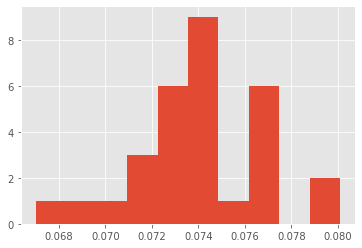

In [22]:
# data viz
pd.DataFrame(inconsistent_rate,columns=['rate'])['rate'].hist()

In [25]:
# statistics
pd.DataFrame(inconsistent_rate,columns=['rate'])['rate'].describe()

count    30.000000
mean      0.074120
std       0.002783
min       0.067000
25%       0.073125
50%       0.074100
75%       0.075875
max       0.080100
Name: rate, dtype: float64